In [1]:
#180612
#sarahfong
#this is a script to compare the number of species alignments in UCSC hg19 46-way and 8-way with villar's alignment calls for their peaks generated from EPO

In [2]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.4.3”

In [6]:
#get 46-way human-specific bed-files
dir = "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/villar_ref_data/villar_maf/"
#dir = '/Users/sarahfong/Desktop/CAPRA/broadly_active_enhancers/villar_maf/villar_intersect_9-way/'
setwd(dir)

In [13]:
#load in the first chromosome as a seed dataframe.
df<- read.table("chr1_hspec_x_hg19-9way.bed", sep = '\t') 

names(df) = c("v_chr", "v_start", "v_end", "hg19_chr", "hg19_start", "hg19_end", "strand","ref", "sp46", "sp8_villar", "bp_overlap")
dim(df)
head(df)

[1] 4839   11

v_chr,v_start,v_end,hg19_chr,hg19_start,hg19_end,strand,ref,sp46,sp8_villar,bp_overlap
chr1,40731346,40740422,chr1,40731254,40731378,+,hg19,8,2,32
chr1,40731346,40740422,chr1,40731377,40731441,+,hg19,17,6,64
chr1,40731346,40740422,chr1,40731440,40731519,+,hg19,18,6,79
chr1,40731346,40740422,chr1,40731518,40731543,+,hg19,20,7,25
chr1,40731346,40740422,chr1,40731542,40731592,+,hg19,20,7,50
chr1,40731346,40740422,chr1,40731591,40731643,+,hg19,19,7,52


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


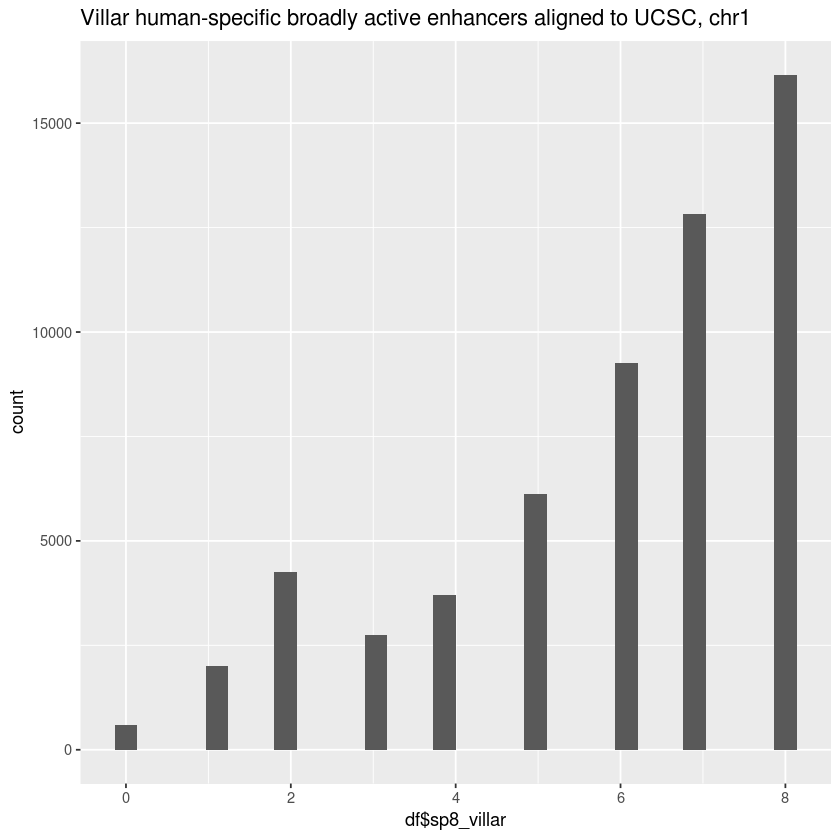

In [38]:
ggplot(df, aes(df$sp8_villar)) + geom_histogram() + ggtitle("Villar human-specific broadly active enhancers aligned to UCSC, chr1")

In [ ]:
a = list.files(pattern = "\\-9way.bed$")
# get rid of the chr1 file we used to build the DataFrame.

a <- a[2:23]
print(a)

#rbind the other chromosomes 
for (file in a) {
  table <- read.table(file, sep = '\t')
  names(table) = c("v_chr", "v_start", "v_end", "hg19_chr", "hg19_start", "hg19_end", "strand","ref", "sp46", "sp8_villar", "bp_overlap")
  print(dim(table))
  df<-rbind(df, table)
}

In [27]:
dim(df)

[1] 57710    11

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


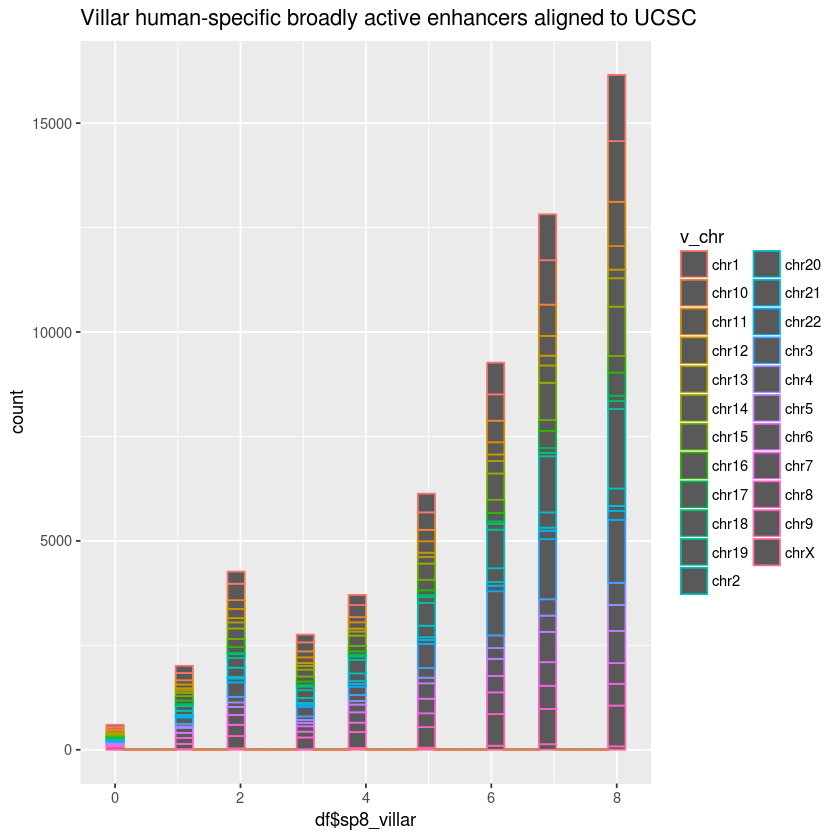

In [39]:
ggplot(df, aes(df$sp8_villar, color = v_chr)) +
  geom_histogram() + 
  ggtitle("Villar human-specific broadly active enhancers aligned to UCSC")

In [32]:
# because 1 villar enhancer can have different species conservations across different stretches, 
#I will make a unique identifier for villar human-specific, broadly active enhancers
df$v_coor = paste0(df$v_chr,":", df$v_start,"-", df$v_end)

df_unique<-data.frame(unique(df$v_coor))
dim(df_unique)
head(df_unique)
#[1] 481   1


[1] 481   1

unique.df.v_coor.
chr1:40731346-40740422
chr1:236146352-236148421
chr1:145112116-145118945
chr1:232712660-232716881
chr1:66835556-66841410
chr1:65894362-65898193


unique.df.v_coor.,avg
chr1:40731346-40740422,6.012739
chr1:236146352-236148421,5.452381
chr1:145112116-145118945,7.170543
chr1:232712660-232716881,5.285714
chr1:66835556-66841410,6.666667
chr1:65894362-65898193,7.528571
chr1:12582234-12592239,3.629921
chr1:174932694-174940283,6.890625
chr1:178023566-178031011,6.543689
chr1:151917031-151919102,7.266667


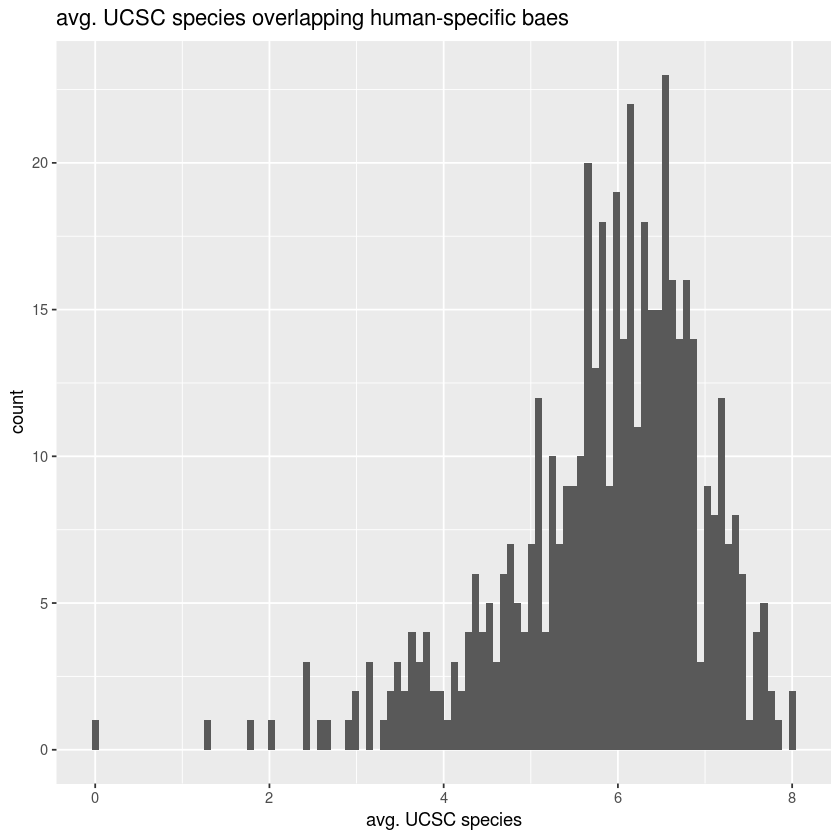

In [36]:
# what is the average number of other 8-overlapping species in UCSC for villar's human-specific broadly active enhancers?

#make an indexed list
avg = c()
i<-1

for (unique in df_unique$unique.df.v_coor.){
    b = subset(df, df$v_coor == unique)
    avg_species <- mean(b$sp8_villar)
    avg[[i]]<- avg_species
    i<-i+1
}

cbind(df_unique, avg)
ggplot(df_unique, aes(avg)) + 
  geom_histogram(bins=100) + 
  xlab("avg. UCSC species") +
  ggtitle("avg. UCSC alignments overlapping Villar human-specific baes")

